In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

import pathlib
data_dir1 = pathlib.Path("/home/snekha/datasets/binary_dep.csv")
data_dir2 = pathlib.Path("/home/snekha/datasets/binary_dep2.csv")
data_dir3 = pathlib.Path("/home/snekha/datasets/binary_dep3.csv")
data_dir4 = pathlib.Path("/home/snekha/datasets/binary_dep4.csv")
data_dir5 = pathlib.Path("/home/snekha/datasets/binary_dep5.csv")

In [3]:
data1=pd.read_csv(data_dir1)
data2=pd.read_csv(data_dir2)
data3=pd.read_csv(data_dir3)
data4=pd.read_csv(data_dir4)
data5=pd.read_csv(data_dir5)

In [4]:
data= pd.concat([data1,data2,data3,data4,data5],ignore_index=True)

In [5]:
data.head()


,Gender,Age,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,Depression
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [6]:
data.shape

(1544, 16)

In [7]:
data.tail()

,Gender,Age,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,Depression
1539,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
1540,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
1541,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
1542,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1
1543,M,61,0,0,0,1,0,1,1,1,1,0,0,1,0,1


In [8]:
data.columns

Index(['Gender', 'Age', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
       'q10', 'q11', 'q12', 'q13', 'Depression'],
      dtype='object')

In [9]:
data.columns.is_unique

True

In [10]:
data.columns.value_counts()

Gender        1
Age           1
q1            1
q2            1
q3            1
q4            1
q5            1
q6            1
q7            1
q8            1
q9            1
q10           1
q11           1
q12           1
q13           1
Depression    1
dtype: int64

In [11]:
data[~data.index.duplicated()]

,Gender,Age,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,Depression
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
1540,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
1541,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
1542,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


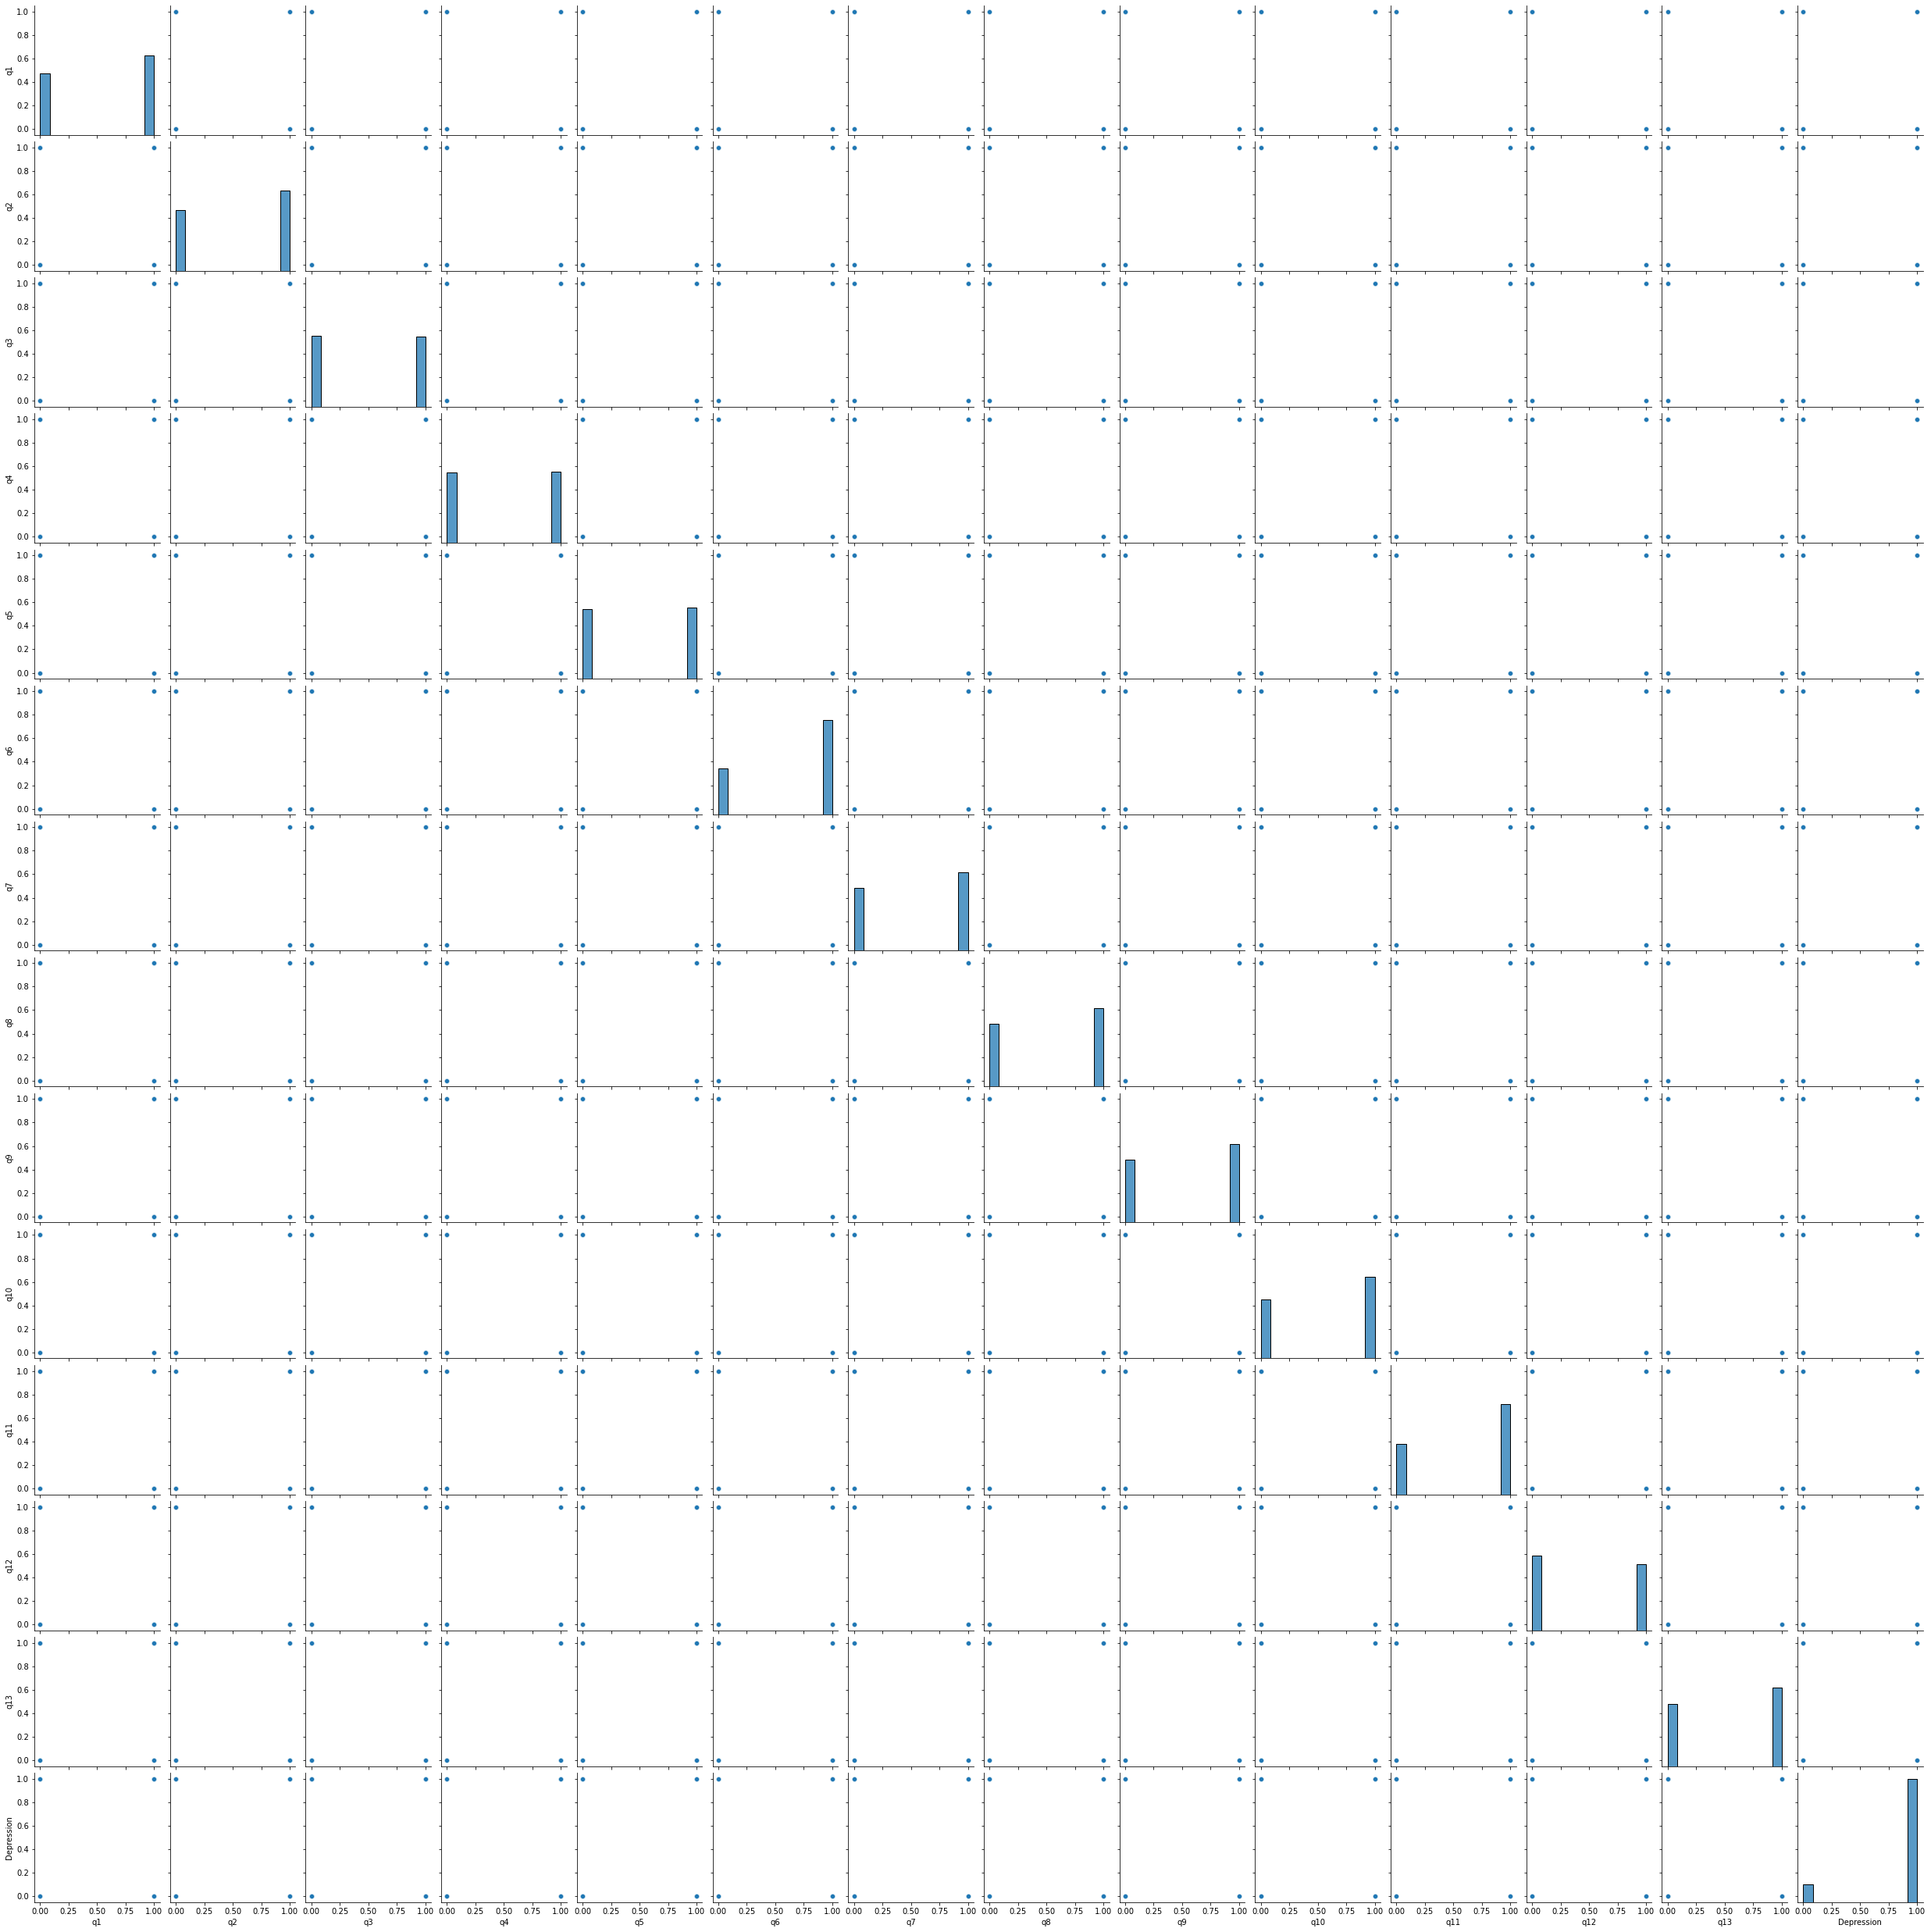

In [12]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, vars = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'q11', 'q12','q13', 'Depression'])

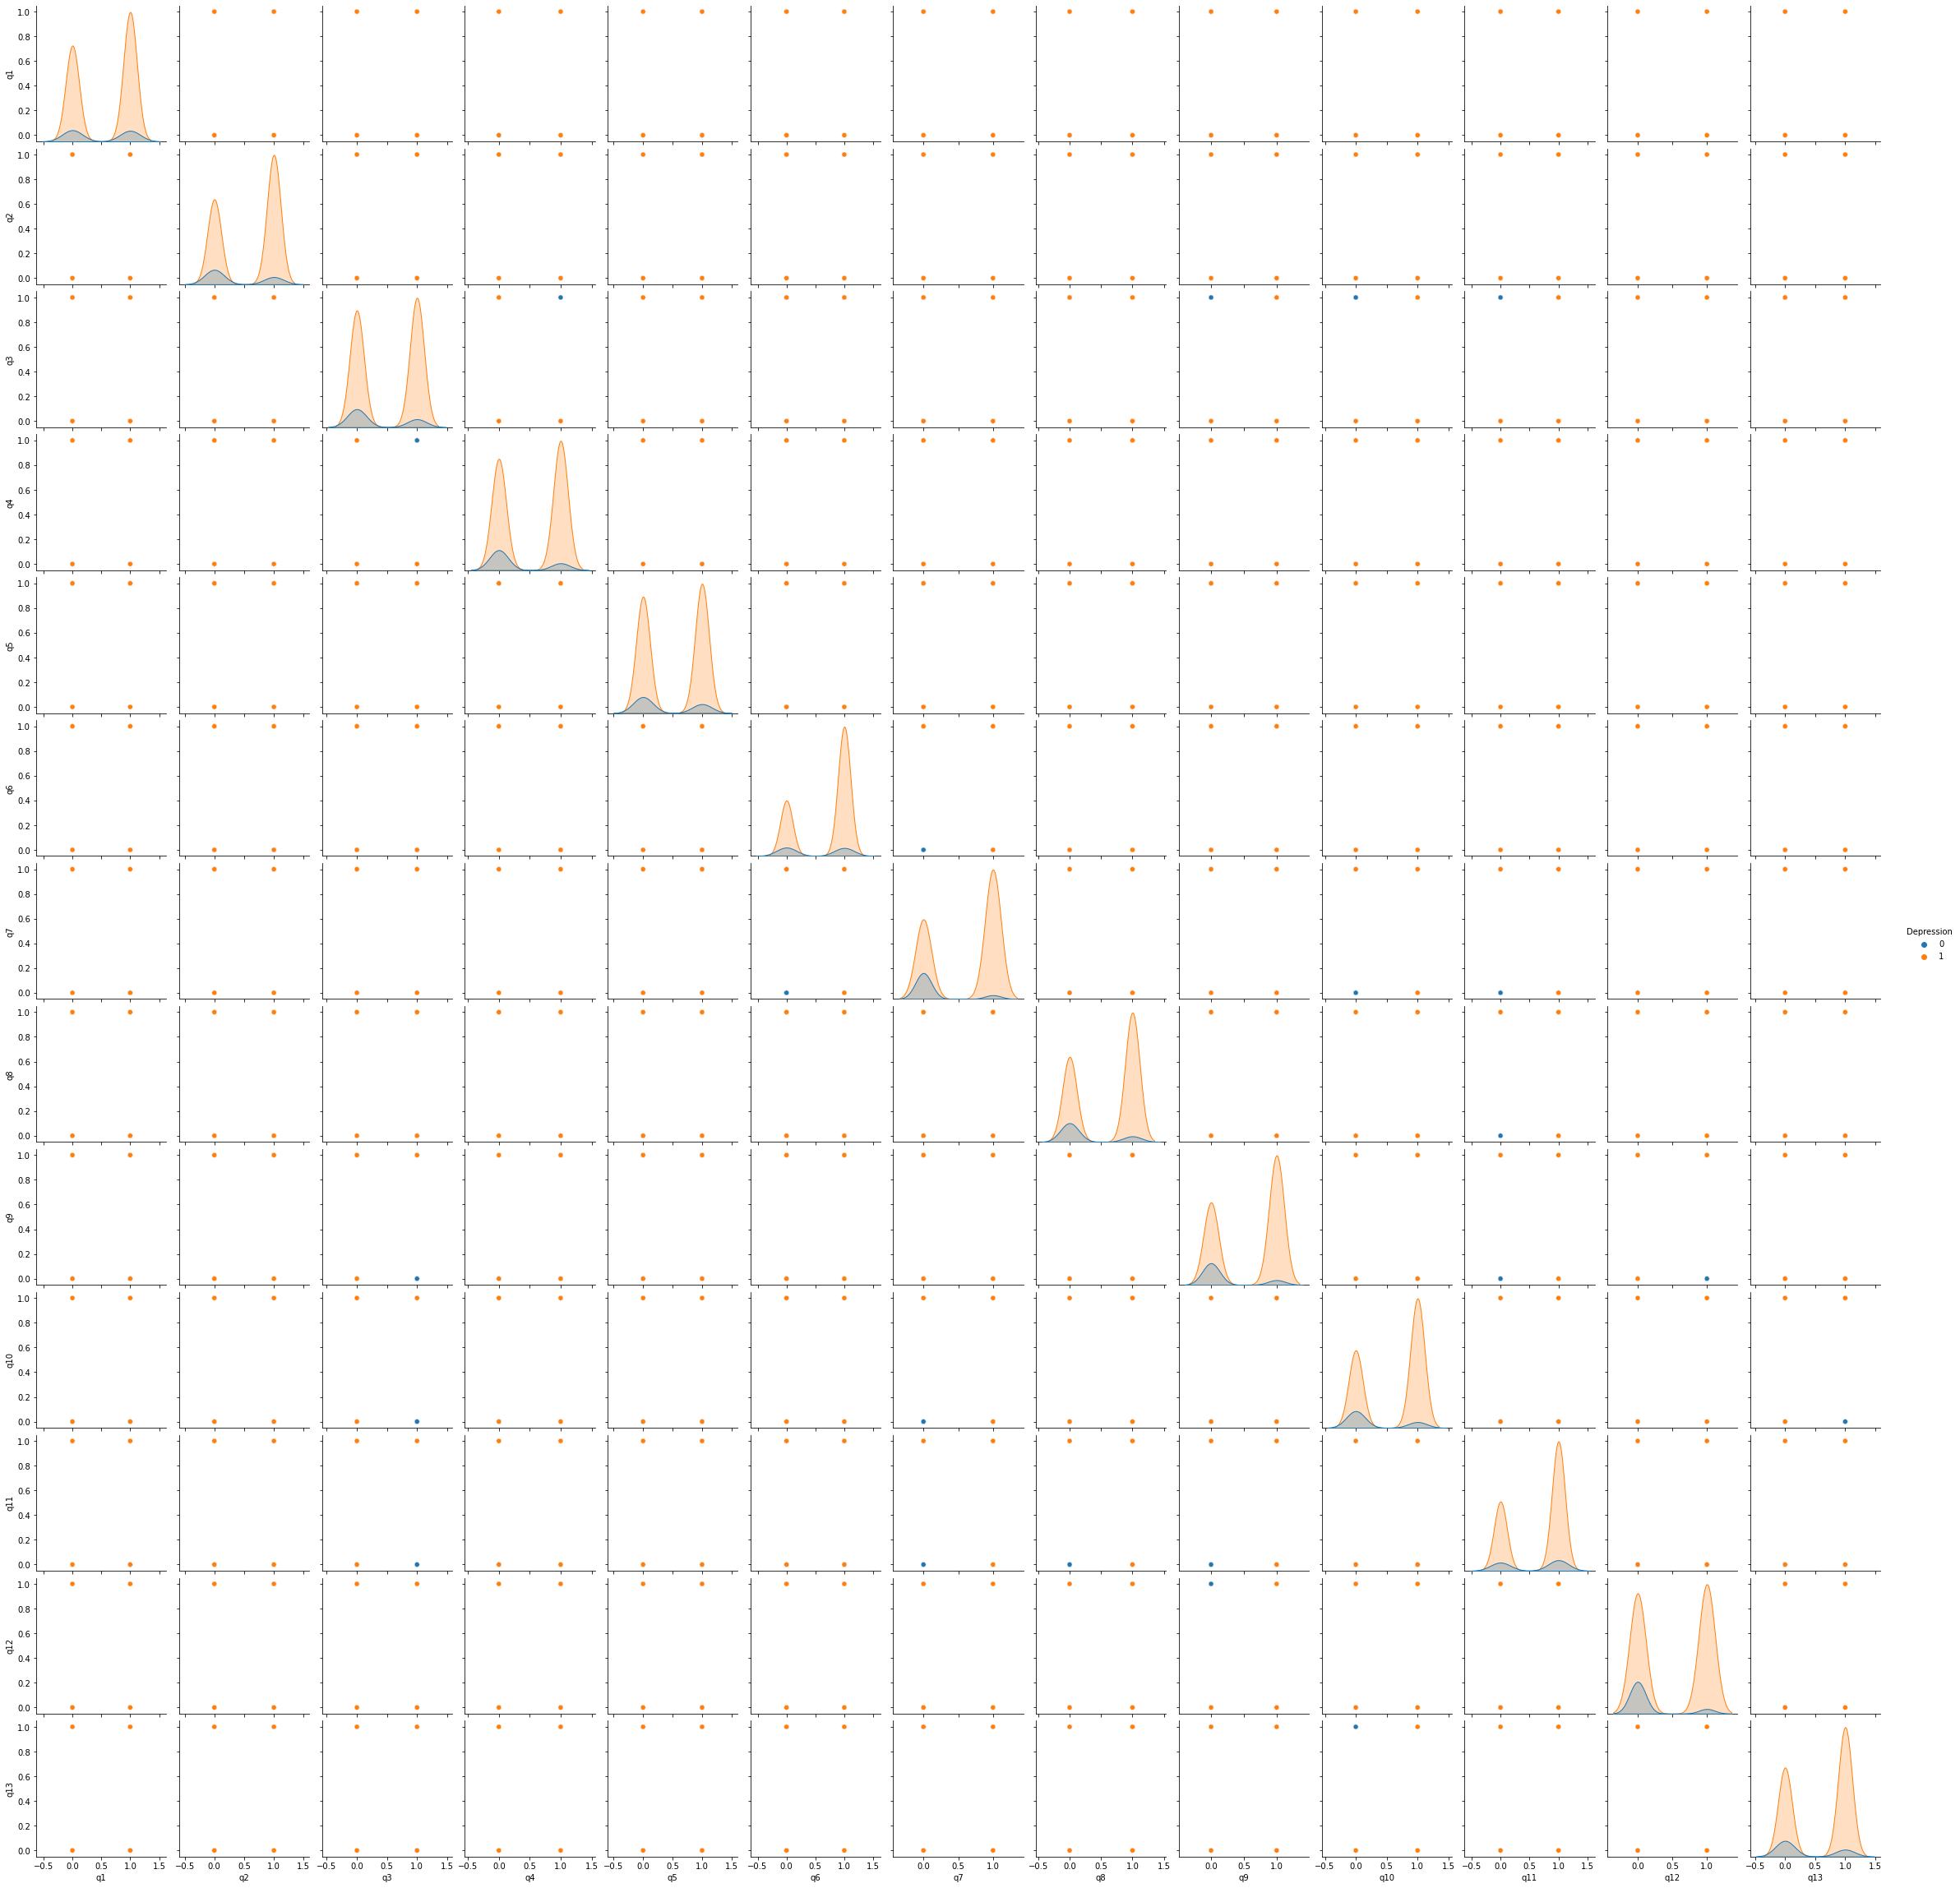

In [13]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, hue = 'Depression',vars = ['q1', 'q2', 'q3', 'q4',
       'q5','q6','q7','q8','q9','q10','q11','q12','q13'] )

In [14]:
data['Depression'].value_counts()

1    1349
0     195
Name: Depression, dtype: int64

/home/snekha/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Depression', ylabel='count'>

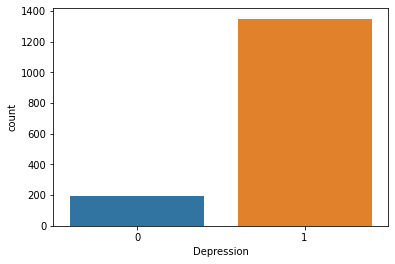

In [15]:
sns.countplot(data['Depression'], label = "Count") 

<AxesSubplot:>

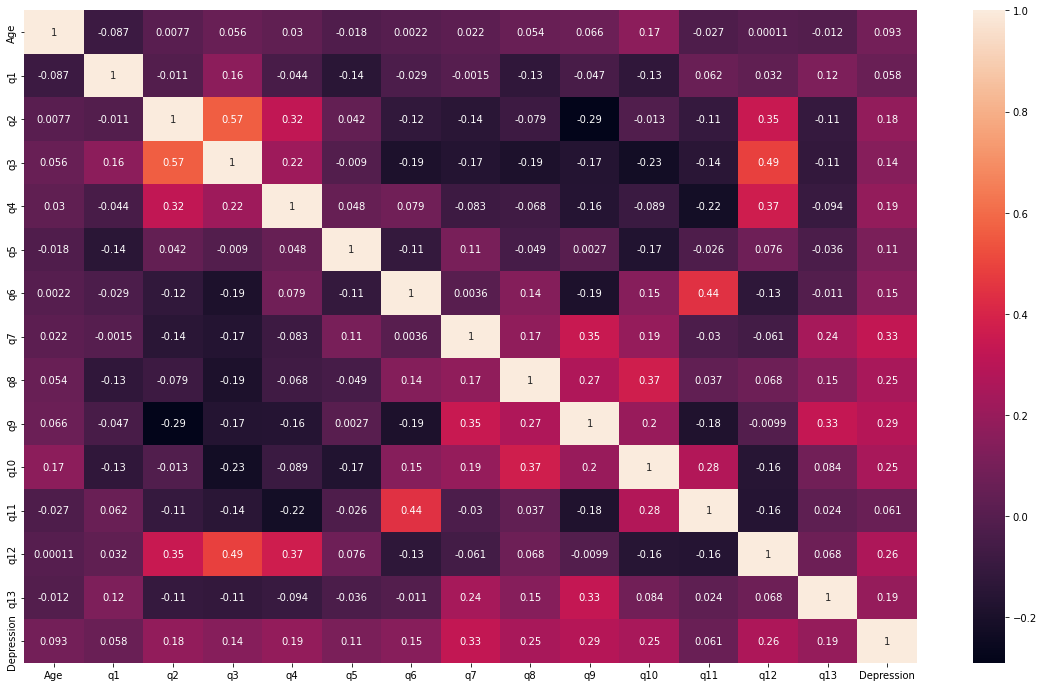

In [16]:
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

In [17]:
X = data.drop(['Depression','Age','Gender'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,1,0,0


In [18]:
y = data['Depression']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Depression, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test X_test= train_test_split(X, y, test_size = 0.2, random_state = 20)

In [21]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (1235, 13)


The size of our testing "X" (input features) is (309, 13)


The size of our training "y" (output feature) is (1235,)


The size of our testing "y" (output features) is (309,)


In [22]:
from sklearn.svm import SVC

In [23]:
svc_model = SVC()

In [24]:
svc_model.fit(X_train, y_train)

SVC()

In [25]:
y_predict = svc_model.predict(X_test)

In [26]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [27]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Depressed', 'is_healthy'],
                         columns=['predicted_depressed','predicted_healthy'])
confusion

,predicted_depressed,predicted_healthy
Depressed,263,4
is_healthy,8,34


<AxesSubplot:>

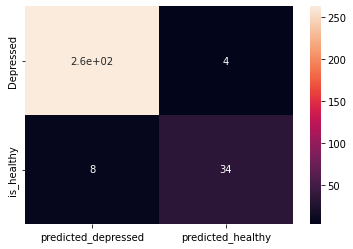

In [28]:
sns.heatmap(confusion, annot=True)

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.97      0.99      0.98       267

    accuracy                           0.96       309
   macro avg       0.93      0.90      0.91       309
weighted avg       0.96      0.96      0.96       309



In [30]:
X_train_min = X_train.min()
X_train_min

q1     0
q2     0
q3     0
q4     0
q5     0
q6     0
q7     0
q8     0
q9     0
q10    0
q11    0
q12    0
q13    0
dtype: int64

In [31]:
X_train_max = X_train.max()
X_train_max

q1     1
q2     1
q3     1
q4     1
q5     1
q6     1
q7     1
q8     1
q9     1
q10    1
q11    1
q12    1
q13    1
dtype: int64

In [32]:
X_train_range = (X_train_max- X_train_min)
X_train_range

q1     1
q2     1
q3     1
q4     1
q5     1
q6     1
q7     1
q8     1
q9     1
q10    1
q11    1
q12    1
q13    1
dtype: int64

In [33]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
150,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1531,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
691,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1371,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [34]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [ ]:
svc_model = SVC({'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
)
svc_model.fit(X_train_scaled, y_train)

NameError: name 'SVC' is not defined

In [36]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [37]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_depressed', 'is_healthy'],
                         columns=['predicted_depression','predicted_healthy'])
confusion

,predicted_depression,predicted_healthy
is_depressed,263,4
is_healthy,8,34


<AxesSubplot:>

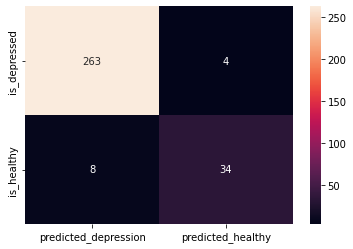

In [38]:
sns.heatmap(confusion,annot=True,fmt="d")

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.97      0.99      0.98       267

    accuracy                           0.96       309
   macro avg       0.93      0.90      0.91       309
weighted avg       0.96      0.96      0.96       309



In [40]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [43]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.911 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [44]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=100, gamma=0.1)


In [45]:
grid_predictions = grid.predict(X_test_scaled)

In [46]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_depressed', 'is_healthy'],
                         columns=['predicted_depressed','predicted_healthy'])
confusion

,predicted_depressed,predicted_healthy
is_depressed,260,7
is_healthy,7,35


<AxesSubplot:>

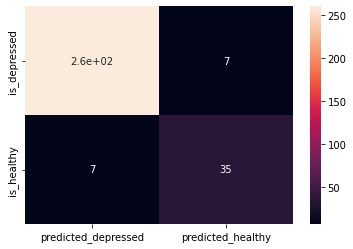

In [47]:
sns.heatmap(confusion, annot=True)

In [48]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.97      0.97      0.97       267

    accuracy                           0.95       309
   macro avg       0.90      0.90      0.90       309
weighted avg       0.95      0.95      0.95       309



In [49]:
data.to_csv('dep_df5.csv')

In [50]:
pickle.dump(svc_model, open('model.pkl','wb'))